# Informe de Aplicación del Perceptrón Simple y Multicapa al conjunto de datos del grupo 6

Grupo:

Juan Guillermo Zafra

Juan Salvador Magariños Alba

Jorge Cabrera Rodríguez

Jorge González Delgado


# 1. Carga de librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from datetime import datetime

# 2. Carga de los datos

Se cargan un fichero txt con los datos de diferentes especímenes de trigo pertenecientes a una de tres categorías, 1, 2 o 3. La tabla tiene un total de 210 instancias, cada una con 8 variables, siendo una de ellas la clase (1, 2 o 3).

In [3]:
seed_stats = np.loadtxt("seeds_dataset.txt", dtype=float, delimiter='\t')
print(seed_stats)
(n_samples, n_features) = seed_stats.shape
print(f'Rows: {n_samples}')
print(f'Columns: {n_features}')

[[15.26   14.84    0.871  ...  2.221   5.22    1.    ]
 [14.88   14.57    0.8811 ...  1.018   4.956   1.    ]
 [14.29   14.09    0.905  ...  2.699   4.825   1.    ]
 ...
 [13.2    13.66    0.8883 ...  8.315   5.056   3.    ]
 [11.84   13.21    0.8521 ...  3.598   5.044   3.    ]
 [12.3    13.34    0.8684 ...  5.637   5.063   3.    ]]
Rows: 210
Columns: 8


# 3. Preprocesado de datos

En este caso, solo disponemos de una tabla de datos, por lo que se deben extraer de ella los conjuntos de entrenamiento, validación y testeo. Para ello, se ha separado primero el de validación (50%) de los otros dos (50% entre ambos), para luego separar también ese 50% por la mitad, una para cada uno. De esta forma, los porcentajes finales son un 50% para el conjunto de entrenamiento y un 25% para los otros dos.

In [5]:
train_size = 0.5
other_size = 0.5
valid_size = 0.5
test_size = 0.5

type_column = seed_stats[:, n_features - 1]
seed_stats_normalized = preprocessing.normalize(seed_stats)
seed_stats_normalized[:, n_features - 1] = type_column

patterns_input = seed_stats_normalized[:, :n_features-1]
patterns_target = seed_stats_normalized[:, -1]

input_train, input_others, target_train, target_others = train_test_split(
    patterns_input, patterns_target, train_size = train_size, test_size = other_size,
    random_state = 0, shuffle = True)

input_valid, input_test, target_valid, target_test = train_test_split(
    input_others, target_others, train_size = valid_size, test_size = test_size,
    random_state = 0, shuffle = True)

# 4. Resultados iniciales Perceptrón Simple

Hemos decidido entrenar el modelo con 60 iteraciones, que es más o menos cuando converge el algoritmo. A diferencia del ejemplo visto en clase, parece que la precisión obtenida en el conjunto de validación es mayor que la del de entrenamiento, y que la calidad de ambas es notablemente menor (cerca del 20%).

In [6]:
max_iter = 60
print("Learning a Perceptron with %d maximum number of iterations and ..." % max_iter)
perceptron = Perceptron(max_iter = max_iter, shuffle = False, random_state = 0, verbose = True)
perceptron.fit(input_train, target_train)

# Results
print("\n~~~ Imprimiendo los resultados del Perceptrón Simple ~~~\n")
predict_train = perceptron.predict(input_train)
predict_valid = perceptron.predict(input_valid)
print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))

Learning a Perceptron with 60 maximum number of iterations and ...
-- Epoch 1
Norm: 1.50, NNZs: 7, Bias: -1.000000, T: 105, Avg. loss: 0.411344
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.48, NNZs: 7, Bias: -1.000000, T: 210, Avg. loss: 0.398965
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.77, NNZs: 7, Bias: -1.000000, T: 315, Avg. loss: 0.398027
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.10, NNZs: 7, Bias: -1.000000, T: 420, Avg. loss: 0.380392
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 6.44, NNZs: 7, Bias: -1.000000, T: 525, Avg. loss: 0.362757
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 7.79, NNZs: 7, Bias: -1.000000, T: 630, Avg. loss: 0.345122
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 9.07, NNZs: 7, Bias: -1.000000, T: 735, Avg. loss: 0.314254
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 10.12, NNZs: 7, Bias: -1.000000, T: 840, Avg. loss: 0.284460
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 10.77, NNZs: 7, Bia

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


# 5. Resultados iniciales Perceptrón Multicapa

Para el Perceptrón Multicapa hemos decidido usar estos parámetros:

*   Neuronas ocultas: 80
*   Iteraciones máximas: 300
*   Tasa de aprendizaje inicial: 0.01
*   Ciclos: 5
*   Parada antes de tiempo: sí



~~~ Learning a MLP with 80 hidden neurons, 300 maximum number of iterations and 0.01000000 learning rate ... ~~~

Iteration 5, train loss = 1.06615032, valid loss = 1.06623075
Iteration 10, train loss = 1.02910352, valid loss = 1.00992404
Iteration 15, train loss = 0.98091732, valid loss = 0.96732867
Iteration 20, train loss = 0.92040250, valid loss = 0.89622982
Iteration 25, train loss = 0.85038081, valid loss = 0.82347039
Iteration 30, train loss = 0.77625479, valid loss = 0.75073344
Iteration 35, train loss = 0.70405123, valid loss = 0.67951130
Iteration 40, train loss = 0.63840355, valid loss = 0.61731710
Iteration 45, train loss = 0.58038103, valid loss = 0.56613339
Iteration 50, train loss = 0.52897121, valid loss = 0.51974853
Iteration 55, train loss = 0.48265510, valid loss = 0.47864744
Iteration 60, train loss = 0.44073689, valid loss = 0.44216900
Iteration 65, train loss = 0.40320100, valid loss = 0.40866556
Iteration 70, train loss = 0.37017388, valid loss = 0.38015319
Iter

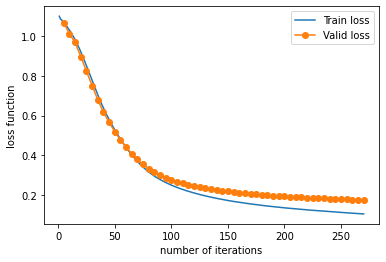


~~~ Printing initial results~~~

Train accuracy: 97.143%
Valid accuracy: 90.385%

Train confusion matrix:
[[33  0  1]
 [ 1 34  0]
 [ 1  0 35]]
Valid confusion matrix:
[[19  1  1]
 [ 2 12  0]
 [ 1  0 16]]
Train classification report:
              precision    recall  f1-score   support

         1.0       0.94      0.97      0.96        34
         2.0       1.00      0.97      0.99        35
         3.0       0.97      0.97      0.97        36

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105

Valid classification report:
              precision    recall  f1-score   support

         1.0       0.86      0.90      0.88        21
         2.0       0.92      0.86      0.89        14
         3.0       0.94      0.94      0.94        17

    accuracy                           0.90        52
   macro avg       0.91      0.90      0.90        52
weighted avg       0.90      0

In [7]:
# Modelar el perceptrón multicapa

def MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, verbose):
    """
    Train and valid MLP every valid_cycles iterations
    """
    classes  = np.unique(target_train)
    loss_valid = []
    for i in range(max_iter//valid_cycles):
        for j in range(valid_cycles):
            out = mlp.partial_fit(input_train, target_train, classes)
            # Calculate loss function of valid set
        last_lost_valid = log_loss(target_valid, mlp.predict_proba(input_valid))
        loss_valid.append(last_lost_valid)
        if verbose:
            print("Iteration %d, train loss = %.8f, valid loss = %.8f" %
                  (mlp.n_iter_, mlp.loss_, last_lost_valid))
        if early_stopping and (i > 0) and (last_lost_valid > loss_valid[-2]): # Early stopping
            if verbose:
                print("Early stopping: Validation score did not improve")
            break
    if verbose: print(out)
    
    if verbose:
        # Visualizing the Cost Function Trajectory
        print("Visualizing the Cost Function Trajectory")
        plt.plot(range(1, len(mlp.loss_curve_)+1), mlp.loss_curve_, label='Train loss')
        plt.plot(range(valid_cycles,len(loss_valid)*valid_cycles+valid_cycles,valid_cycles), loss_valid, '-o', label='Valid loss')
        plt.xlabel('number of iterations')
        plt.ylabel('loss function')
        plt.legend(loc='upper right')
        plt.show()

# Multilayer Percetron wiht n_hidden hidden neurons
n_hidden = 80
max_iter = 300
learning_rate_init = 0.01
valid_cycles = 5
early_stopping = True

print("\n~~~ Learning a MLP with %d hidden neurons, %d maximum number of iterations and %.8f learning rate ... ~~~\n" % (n_hidden, max_iter, learning_rate_init))

mlp = MLPClassifier(hidden_layer_sizes = (n_hidden,), learning_rate_init = learning_rate_init, shuffle = False, random_state = 0, verbose = False)

MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, True)

# Resultados

print("\n~~~ Printing initial results~~~\n")

predict_train = mlp.predict(input_train)
predict_valid = mlp.predict(input_valid)

print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))

print("\nTrain confusion matrix:")
print(confusion_matrix(target_train, predict_train))
print("Valid confusion matrix:")
print(confusion_matrix(target_valid, predict_valid))

print("Train classification report:")
print(classification_report(target_train, predict_train))
print("Valid classification report:")
print(classification_report(target_valid, predict_valid))

Como se ve en la gráfica, estos valores de los parámetros permiten una curva de errores más o menos estable. Además, en ambas matrices de confusión se puede ver que la red neuronal funciona de manera bastante aceptable, pues la precisión ha subido bastante y ahora la precisión del conjunto de entrenamiento es superior.

# 6. Optimización del ratio de aprendizaje

En este caso, a diferencia del ejemplo de clase, las curvas obtenidas son bastante menos planas; pero se puede ver que son claramente más estables cuando el ratio de aprendizaje es 0.01 o 0.005. De estos valores, precisamente es 0.01 el que habíamos elegido en el paso anterior.


~~~ Optimización del ratio de aprendizaje ~~~

Number of seconds for training: 2
Visualizing the Cost Function Trajectory with different learning rates


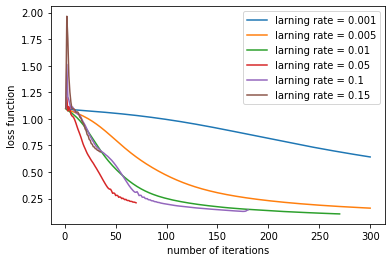

In [8]:
print("\n~~~ Optimización del ratio de aprendizaje ~~~\n")

tests_learning_rate_init = [0.001, 0.005, 0.01, 0.05, 0.1, 0.15]
activation = 'relu'
random_state = 0

now = datetime.now()
loss_curves =  []
for lr in tests_learning_rate_init:
    mlp = MLPClassifier(hidden_layer_sizes = (n_hidden,), learning_rate_init = lr, shuffle = False, random_state = random_state, verbose = False, activation=activation)
    MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, False)
    
    loss_curves.append(mlp.loss_curve_)

print("Number of seconds for training: %d" % (datetime.now() - now).total_seconds())

# Show results
print("Visualizing the Cost Function Trajectory with different learning rates")
for (lr, loss_curve) in zip(tests_learning_rate_init, loss_curves):
    plt.plot(range(1, len(loss_curve) + 1), loss_curve, label = 'larning rate = ' + str(lr))

plt.xlabel('number of iterations')
plt.ylabel('loss function')
plt.legend(loc = 'upper right')
plt.show()

# 7. Optimización de la arquitectura

Se ve que la mejor cantidad de neuronas ocultas es, aproximadamente, 110, pues a partir de ella se estabilizan los errores cometidos.

Seed = 0, train acc = 0.93333333, valid acc = 0.90384615, iterations = 300
Seed = 1, train acc = 0.80000000, valid acc = 0.76923077, iterations = 300
Seed = 2, train acc = 0.82857143, valid acc = 0.75000000, iterations = 300
Seed = 3, train acc = 0.47619048, valid acc = 0.65384615, iterations = 20
Seed = 4, train acc = 0.42857143, valid acc = 0.42307692, iterations = 25
Seed = 5, train acc = 0.86666667, valid acc = 0.76923077, iterations = 300
Seed = 6, train acc = 0.82857143, valid acc = 0.76923077, iterations = 300
Seed = 7, train acc = 0.82857143, valid acc = 0.78846154, iterations = 300
Seed = 8, train acc = 0.93333333, valid acc = 0.88461538, iterations = 300
Seed = 9, train acc = 0.36190476, valid acc = 0.30769231, iterations = 40
Number hidden units = 10, train acc = 0.93333333, max valid acc = 0.90384615
Seed = 0, train acc = 0.93333333, valid acc = 0.90384615, iterations = 300
Seed = 1, train acc = 0.55238095, valid acc = 0.48076923, iterations = 20
Seed = 2, train acc = 0.942

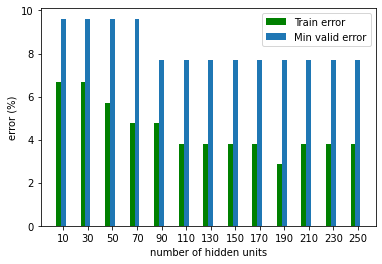

In [9]:
# Test MLP with differents number of hidden units and several repetitions
tests_n_hidden = [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250]
n_reps = 10
# n_reps = 20
activation = 'relu'
# activation = 'logistic'
# learning_rate_init = 0.001
# learning_rate_init = 0.01
learning_rate_init = 0.005

now = datetime.now()
best_mlp = []
best_acc = 0.0
accs_train = []
accs_valid = []
for n_hidden in tests_n_hidden:
    max_acc_train = max_acc_valid = 0.0
    for random_state in range(n_reps):
        mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=learning_rate_init, shuffle=False, random_state=random_state, verbose=False, activation=activation)
        MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, False)
        
        acc_train = accuracy_score(target_train, mlp.predict(input_train))
        acc_valid = accuracy_score(target_valid,mlp.predict(input_valid))
        print("Seed = %d, train acc = %.8f, valid acc = %.8f, iterations = %d" % (random_state, acc_train, acc_valid, len(mlp.loss_curve_)))
        if (max_acc_valid < acc_valid):
            max_acc_valid = acc_valid
            max_acc_train = acc_train
            if (acc_valid > best_acc):
                best_acc = acc_valid
                best_mlp = mlp
    accs_train.append(max_acc_train)
    accs_valid.append(max_acc_valid)
    print("Number hidden units = %i, train acc = %.8f, max valid acc = %.8f" % (n_hidden, max_acc_train, max_acc_valid))

print("Number of seconds for training: %d" % (datetime.now() - now).total_seconds())
print("Best MLP valid accuracy: %.8f%%" % (best_acc * 100))
print("Best MLP: ", best_mlp)

# Show results

width = 4
plt.bar(np.array(tests_n_hidden) - width, 100 *(1- np.array(accs_train)), color='g', width=width, label='Train error')
plt.bar(np.array(tests_n_hidden), 100 *(1- np.array(accs_valid)), width=width, label='Min valid error')
plt.xlabel('number of hidden units')
plt.ylabel('error (%)')
plt.xticks(np.array(tests_n_hidden), tests_n_hidden)
plt.legend(loc = 'upper right')
plt.show()

# 8. Resultados finales del mejor MLP

Por último, vamos a calcular los resultados finales para el mejor MLP obtenido.

In [10]:
predict_train = best_mlp.predict(input_train)
predict_valid = best_mlp.predict(input_valid)
predict_test = best_mlp.predict(input_test)

print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))
print("Test accuracy: %.3f%%" % (accuracy_score(target_test, predict_test) * 100))

print("Train confusion matrix:")
print(confusion_matrix(target_train, predict_train))
print("Valid confusion matrix:")
print(confusion_matrix(target_valid, predict_valid))
print("Test confusion matrix:")
print(confusion_matrix(target_test, predict_test))

print("Train classification report:")
print(classification_report(target_train, predict_train))
print("Valid classification report:")
print(classification_report(target_valid, predict_valid))
print("Test classification report:")
print(classification_report(target_test, predict_test))

Train accuracy: 95.238%
Valid accuracy: 92.308%
Test accuracy: 88.679%
Train confusion matrix:
[[32  0  2]
 [ 1 34  0]
 [ 2  0 34]]
Valid confusion matrix:
[[20  0  1]
 [ 2 12  0]
 [ 1  0 16]]
Test confusion matrix:
[[ 9  3  3]
 [ 0 21  0]
 [ 0  0 17]]
Train classification report:
              precision    recall  f1-score   support

         1.0       0.91      0.94      0.93        34
         2.0       1.00      0.97      0.99        35
         3.0       0.94      0.94      0.94        36

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105

Valid classification report:
              precision    recall  f1-score   support

         1.0       0.87      0.95      0.91        21
         2.0       1.00      0.86      0.92        14
         3.0       0.94      0.94      0.94        17

    accuracy                           0.92        52
   macro avg       0.94      0.92   

Se ve que ha conservado unos valores de precisión bastante altos, y que la precisión del conjunto de testeo es menor que las otras dos; aunque es normal, pues es la primera vez que la red neuronal trabaja con esos datos.

También obtenemos las curvas ROC, y se aprecia que la clase 1 es la que posee un valor más bajo de precisión.

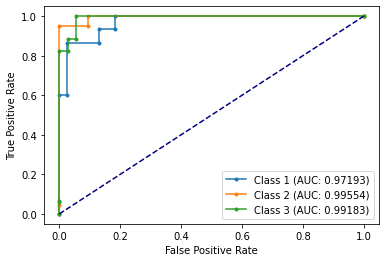

In [12]:
mlp_probs = mlp.predict_proba(input_test)
classes  = np.unique(target_train)
mlp_auc = []
mlp_fpr = []
mlp_tpr = []
for cla in classes:
    mlp_auc.append(roc_auc_score(target_test==cla, mlp_probs[:,int(cla) - 1]))
    fpr, tpr, _ = roc_curve(target_test==cla, mlp_probs[:,int(cla) - 1])
    mlp_fpr.append(fpr)
    mlp_tpr.append(tpr)

# plot the roc curve for the model
for cla in classes:
    # plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(mlp_fpr[int(cla) - 1], mlp_tpr[int(cla) - 1], marker = '.', label = 'Class %d (AUC: %.5f)' % (cla, mlp_auc[int (cla) - 1]))

plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# 9. Conclusiones

Como ya se ha mencionado, aunque los resultados obtenidos sean aceptables, pues todas las precisiones del mejor MLP superan el 85%, la precisión del conjunto de testeo es menor que las otras; pero posiblemente es porque la red neuronal no había procesado esas instancias antes.

Por otro lado, es importante resaltar que nuestro conjunto total de datos posee solo 210 instancias y 7 variables, sin contar la clase, por lo que esto también podría haber afectado negativamente a la fiabilidad y calidad de los modelos, como se puede ver en el perceptrón simple.